# Potential Flow

In one of my first courses as an aeronautical engineering course, i was introduced to the mathematics behind the study of how airplanes fly. The textbook for this course was *Theoretical Hydrodynamics* by Milne-Thompson, still one of my prized possessions!

In this note, We will explore the equations that demonstrated some of the foundations of flight. In this study, we will use Python **sympy** and **numpy** to handle the math, and **matplotlib** to do some graphics work.

## Basic Vectors

From your high school geometry class, you should be familiar with the basic three-dimensions we typically call **x**, **y** and **z**. These three names refer to *coordinates* in space. the guy who thought up this idea was Rene Descartes. The story goes that he was lying in his bedroom watching a [fly on the ceiling](https://wild.maths.org/ren%C3%A9-descartes-and-fly-ceiling) and thought up a way to specify where that fly was located at any moment in time. The would simply measure the distance the fly was from the corner of his room along three mutually perpendicular lines that traces the walls and ceiling of his room. Today, we call this system the *cartesian coodinate system*!

In [4]:
%reload_ext tikzmagic

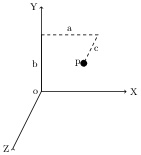

In [30]:

%%tikz
\node[left] at (0,0) {o};
\node[left] (y) at (0,3) {Y};
\draw[->](0,0) -- (0,3);
\node[right] (x) at (3,0) {X};
\draw[->] (0,0) -- (3,0);
\coordinate (z) at (-1,-2);
\draw[->] (0,0) -- (-1,-2) (z);
\node[left] (p1) at (z) {Z};

\draw[dashed] (0,2) -- node[above] {a} (2,2) -- node[right] {c} ++(-0.5,-1) node[left]  {p};
\filldraw (1.5,1) circle (3pt);
\draw (0,0) -- node[left] {b} (0,2);

The origin od this system is labeled **o** and the arrows are drawn along the *coordinate axes*. Two such axes define a *plane*. We will be focusing on things sitting on the **X_Y** plane in this discussion.

We can define a position in this coordinate system using three numbers, representing the distance alone each axis. In the diagram above point **p** is at **(a,b,c)**.
